# Bonjour à tous

## Ceci est un exemple d'implémentation de Python en ETT STI2D. Il s'agissait pour les élèves de calculer le trajet le plus court entre 2 points d'un même parallèle. Evidemment cela n'a pas été réalisé ainsi. C'est juste une exemple pour vous. Les fonctions de traçage sur une carte en utilisant les bibliothèques matplotlib ou cartopy n'ont pas été encore implémentées.

### 1 - Importation des bibliothèques de fonctions nécessaires.
</br>
</br>
<p>Pour utiliser les fonctions mathématiques, 
    nous utiliserons la bibliotheque math (cf. https://docs.python.org/3/library/math.html).</p>
<p>Pour utiliser les fonctions de traçage,
    nous uiliserons la bibliothèque matplotlib (cf. https://matplotlib.org/).</p>

In [101]:
from math import cos, sin, acos, pi

### 2 - Définition de la classe d'objet Point_Coordonnees_Geographiques_3D
</br>
<p> Dans cet exemple, il est proposé de construire une classe d'objet : Point_Coordonnees_Geographiques_3D.</p>
<p>L'objectif étant de calculer la distance entre 2 points M1 et M2, il sera donc créer 2 points de classe Point_Coordonnees_Geographiques_3D.</p>
<P>Et non pas, $2*3=6$ variables pour gérer les coordonnées des 2 points M1 et M2.</p></br>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/62/Latitude_and_Longitude_of_the_Earth.svg/320px-Latitude_and_Longitude_of_the_Earth.svg.png">
<p> L'altitude n'intervenant pas dans nos modèles de calcul de trajets. Les points seront donc de la forme (lattitude,longitude,0).</p>


In [102]:
class Point_Coordonnees_Geographiques_3D:
    "Utilisation du constructeur init pour intialiser le point au coordonnées (0;0;0)."
    def __init__(self):
        "Crée le point (latt=0,long=0,alt=0)."
        self.latt=0
        self.long=0
        self.alt=0

### 3 - Définition des coordonnées géographiques des points M1 & M2
</br>
<p>Il suffit juste de remplir les points M1 et M2 de classe Point_Coordonnees_Geographiques_3D.</p>

In [103]:
"Création des points M1 et M2, de classe Point_Coordonnees_Geographiques"
M1=Point_Coordonnees_Geographiques_3D()
M2=Point_Coordonnees_Geographiques_3D()

"Affichage des points initialisés par le constructeur _init_ lors de la définition de classe"
print("M1 : lattitude = ",M1.latt,"° ,longitude = ",M1.long,"° ,altitude = ",M1.alt,"m")
print("M2 : lattitude = ",M2.latt,"° ,longitude = ",M2.long,"° ,altitude = ",M2.alt,"m")


"Définition des coordonnées géographiques des points M1 et M2 en degrés décimaux."
M1.latt=50
M1.long=70
M2.latt=50
M2.long=-20

"Affichage des points avec leurs nouvelles coordonnées."
print()
print("Après saisie des coordonnées")
print("M1 : lattitude = ",M1.latt,"° ,longitude = ",M1.long,"° ,altitude = ",M1.alt,"m")
print("M2 : lattitude = ",M2.latt,"° ,longitude = ",M2.long,"° ,altitude = ",M2.alt,"m")

M1 : lattitude =  0 ° ,longitude =  0 ° ,altitude =  0 m
M2 : lattitude =  0 ° ,longitude =  0 ° ,altitude =  0 m

Après saisie des coordonnées
M1 : lattitude =  50 ° ,longitude =  70 ° ,altitude =  0 m
M2 : lattitude =  50 ° ,longitude =  -20 ° ,altitude =  0 m


### 4 - Transformation des coordonnées des points de degré en radian
</br>
<p>Pour ce faire, nous créerons une fonction Conv_Deg_Rad pour convertir l'angle en degré AngDeg (paramètre d'entrée) en angle en radian AngRad (paramètre de sortie).</p>
$$AngRad=\frac{AngDeg}{360}*2\pi$$
</br>
<p> Dans cet exemple, $\pi=3.1416$ pour assurer la lisibilité du code. Il aurait aussi été possible d'utiliser la définition de $\pi$ dans la bibliothèque math appelé en début de séquence math.pi. De plus, dans cette même bibliothèque, il existe évidemment une fonction permettant de convertir des degrés en radians math.radians() et vice-versa math.degrees().

In [104]:
def Conv_Deg_Rad(AngDeg):
    """Convertit un angle en "degré décimaux" en "radians"""
    AngRad=AngDeg/360*2*3.1416
    return AngRad

<p>Il ne reste plus alors qu'à modifier les coordonnées de chaque point, sauf sur l'altitude évidemment.

In [105]:

M1.latt=round(Conv_Deg_Rad(M1.latt),4)
M1.long=round(Conv_Deg_Rad(M1.long),4)
M2.latt=round(Conv_Deg_Rad(M2.latt),4)
M2.long=round(Conv_Deg_Rad(M2.long),4)

"Affichage des points avec leurs nouvelles coordonnées en radian."
print()
print("Après saisie des coordonnées")
print()
print("M1 : lattitude = ",M1.latt,"rad ,longitude = ",M1.long,"rad")
print("M2 : lattitude = ",M2.latt,"rad ,longitude = ",M2.long,"rad")


Après saisie des coordonnées

M1 : lattitude =  0.8727 rad ,longitude =  1.2217 rad
M2 : lattitude =  0.8727 rad ,longitude =  -0.3491 rad


### 5 - Calcul de la distance selon un trajet le long du "Grand Cercle" associés aux 2 points (orthodromie).
</br>
<p> Comme vu précédemment dans la résolution analytique du problème, nous utiliserons la formule ci-dessous pour évaluer la longueur de l'arc de Grand Cercle séparant nos deux points de coordonnées.</p></br>
$$\alpha=\arccos(\cos(\phi 1)\cos(\phi 2)\cos(\theta 1 - \theta 2)+\sin(\phi 1)\sin(\phi 2))$$</br>
<p> avec </p>
<p>$\phi 1$ : lattitude de M1 / $\theta 1$ : longitude de M1 </p>
<p>$\phi 2$ : lattitude de M2 / $\theta 2$ : longitude de M2 </p>
</br>
<p> Une fonction Long_Arc_Gd_Cercle est implémentée avec les lattitudes et longitudes des 2 points M1 et M2 en paramètres d'entrée. Cette fonction fournira en sortie la distance parcourue selon la formule d'arc suivante : </p>
</br>
$$L\tiny dist \normalsize = R \tiny Terre \normalsize * \alpha$$

In [106]:
def Long_Arc_Gd_Cercle(Phi1, Theta1, Phi2, Theta2):
    Rayon_Terre = 6370
    Alpha = acos(abs(cos(Phi1)*cos(Phi2)*cos(abs(Theta1-Theta2)) + sin(Phi1)*sin(Phi2)))
    return Rayon_Terre*Alpha

### 6 - Calcul de la distance selon un trajet le long du parrallèle commun aux 2 points (loxodromie).
</br>
<p> Comme vu précédemment dans la résolution analytique du problème, nous utiliserons la formule ci-dessous pour évaluer la longueur de l'arc du parallèle séparant nos deux points de coordonnées.</p></br>
$$\beta=(\theta 1 - \theta 2)$$</br>
$$R \tiny TerreParallele \normalsize = sin(\phi1)*R \tiny Terre \normalsize$$
<p> avec </p>
<p>$\phi 1$ : lattitude de M1 / $\phi 2$ : lattitude de M2 / $\theta 1 = \theta 2$ : longitude de M1 ou de M2 </p> 
</br>
<p> Une fonction Long_Arc_Parallele est implémentée avec les lattitudes des 2 points M1 et M2 en paramètres d'entrée. Cette fonction fournira en sortie la distance parcourue selon la formule d'arc suivante : </p>
</br>
$$L\tiny dist \normalsize = R \tiny TerreParallele \normalsize * \beta$$

In [107]:
def Long_Arc_Parallele(Phi1, Theta1, Phi2, Theta2):
    Rayon_Terre = 6370
    Rayon_Terre_Parallele = cos(Phi1)*Rayon_Terre
    Beta = abs(Theta1-Theta2)
    return Rayon_Terre_Parallele*Beta

In [108]:
Distance_Sln_Gd_Cercle = Long_Arc_Gd_Cercle(M1.latt, M1.long, M2.latt, M2.long)
print("La distance entre les 2 points,le long du Grand Cercle associé, est de :",int(Distance_Sln_Gd_Cercle),"km")

La distance entre les 2 points,le long du Grand Cercle associé, est de : 6010 km


In [109]:
Distance_Sln_Parallele = Long_Arc_Parallele(M1.latt, M1.long, M2.latt, M2.long)
print("La distance entre les 2 points, le long du Parallèle associé aux 2 points est de :",int(Distance_Sln_Parallele),"km")

La distance entre les 2 points, le long du Parallèle associé aux 2 points est de : 6431 km


In [110]:
%matplotlib inline

In [111]:
import matplotlib.pyplot as plt
import numpy as np


Liste des abscisses
-------------------
[  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.
  70.  75.  80.  85.  90.  95. 100. 105. 110. 115. 120. 125. 130. 135.
 140. 145. 150. 155. 160. 165. 170. 175. 180.]


Liste des ordonnées calculées lors d'un trajet le long du 50° parallèle
-----------------------------------------------------------------------
[0.0, 357.0, 715.0, 1072.0, 1429.0, 1787.0, 2144.0, 2501.0, 2858.0, 3216.0, 3573.0, 3930.0, 4288.0, 4645.0, 5002.0, 5360.0, 5717.0, 6074.0, 6431.0, 6789.0, 7146.0, 7503.0, 7861.0, 8218.0, 8575.0, 8933.0, 9290.0, 9647.0, 10004.0, 10362.0, 10719.0, 11076.0, 11434.0, 11791.0, 12148.0, 12506.0, 12863.0]


Liste des ordonnées calculées lors d'un trajet le du Grand Cercle associé aux 2 points M1 & M2
----------------------------------------------------------------------------------------------
[0.0, 357.0, 714.0, 1070.0, 1425.0, 1778.0, 2129.0, 2478.0, 2824.0, 3166.0, 3505.0, 3839.0, 4168.0, 4492.0, 4810.0, 5122.0, 5426.0,

<function matplotlib.pyplot.show(*args, **kw)>

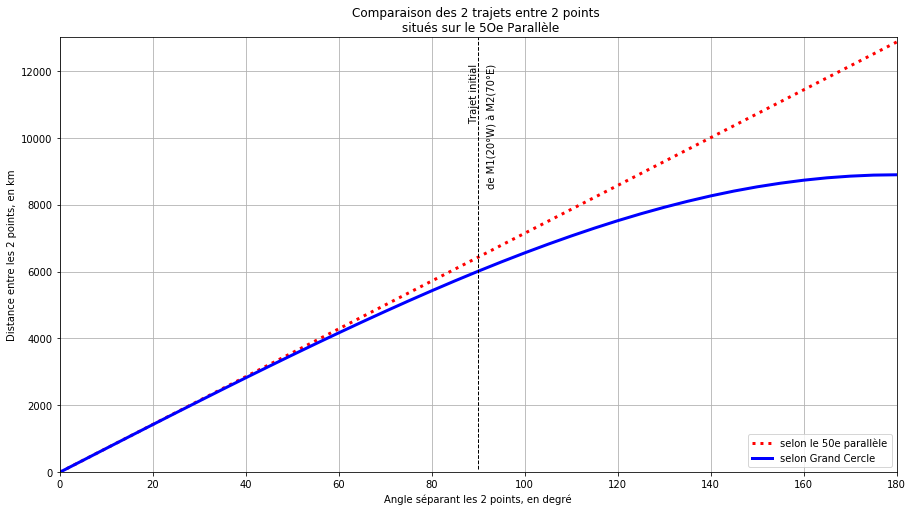

In [116]:
"Définition dr rayon de la Terre, assimilé à une sphère"
Rayon_Terre = 6370

"Discrétisation des abscisses, d'un pas de 180/36=5°"
abscisses = np.linspace(0,180,37)

"Evaluation des ordonnées des deux possibilités de trajet (suivant le parallèle ou le Grand Cercle associé aux 2 points"
ordonnées1 = [round(Rayon_Terre*cos(M1.latt)*(x*np.pi/180),0) for x in abscisses]
ordonnées2 = [round(Rayon_Terre*acos(cos(M1.latt)*cos(M2.latt)*cos(x*np.pi/180+0.0000001) + sin(M1.latt)*sin(M2.latt)),0) for x in abscisses]

"Affichage des tableaux de coordonnées"
print("")
print("Liste des abscisses")
print("-------------------")
print(abscisses)
print("")
print("")
print("Liste des ordonnées calculées lors d'un trajet le long du 50° parallèle")
print("-----------------------------------------------------------------------")
print(ordonnées1)
print("")
print("")
print("Liste des ordonnées calculées lors d'un trajet le du Grand Cercle associé aux 2 points M1 & M2")
print("----------------------------------------------------------------------------------------------")
print(ordonnées2)
print("")

"Dimensionnement de la zone de tracage"
plt.rcParams['figure.figsize'] = [15, 8]

"Définition des limites du graphique, en abscisse et en ordonnée"
plt.xlim(0,180)
plt.ylim(0,13000)

"Traçage des 2 courbes et paramétrage de chacune d'elle"
plt.plot(abscisses,ordonnées1,":" 'r', linewidth=3, label="selon le 50e parallèle")
plt.plot(abscisses,ordonnées2,'b', linewidth=3, label="selon Grand Cercle")

"Définition des titres des axes"
plt.xlabel("Angle séparant les 2 points, en degré")
plt.ylabel("Distance entre les 2 points, en km")

"Définition du titre général et affichage de la légendeé
plt.title("Comparaison des 2 trajets entre 2 points \n situés sur le 5Oe Parallèle")
plt.legend(loc = "lower right")
plt.grid()

"Repérage du trajet initial entre M1 et M2, définis en début d'exercices"
plt.plot([90,90],[90,13000], color ='k', linewidth=1, linestyle="--")
plt.text(88,12000,"Trajet initial",rotation=90)
plt.text(92,12000,"de M1(20°W) à M2(70°E)",rotation=90)

"Affichage du graphique"
plt.show


In [117]:
from mpl_toolkits import mplot3d

In [118]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection=’3d’)

SyntaxError: invalid character in identifier (<ipython-input-118-59314d103402>, line 5)